IMPORT LIBRARIES

In [356]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.datasets import make_classification

IMPORT DATASET

In [357]:
df = pd.read_csv('attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [358]:
replicate_df = df
replicate_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [359]:
label_encoding = {
    'Education':{1 : 'Below College', 2 : 'College', 3 : 'Bachelor', 4 : 'Master', 5 : 'Master'},
    'JobSatisfaction':{1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very high'},
    'JobInvolvement':{1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very high'},
    'EnvironmentSatisfaction':{1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very high'},
    'RelationshipSatisfaction':{1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very high'},
    'PerformanceRating':{1 : 'Low', 2 : 'Good', 3 : 'Excellent', 4 : 'Outstanding'},
    'WorkLifeBalance':{1 : 'Bad', 2 : 'Good', 3 : 'Better', 4 : 'Best'}
}

In [360]:
replicate_df = replicate_df.replace(label_encoding)
replicate_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very high,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very high,80,1,6,3,Better,2,2,2,2


In [361]:
replicate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [362]:
replicate_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Checking Attrition in Dataset

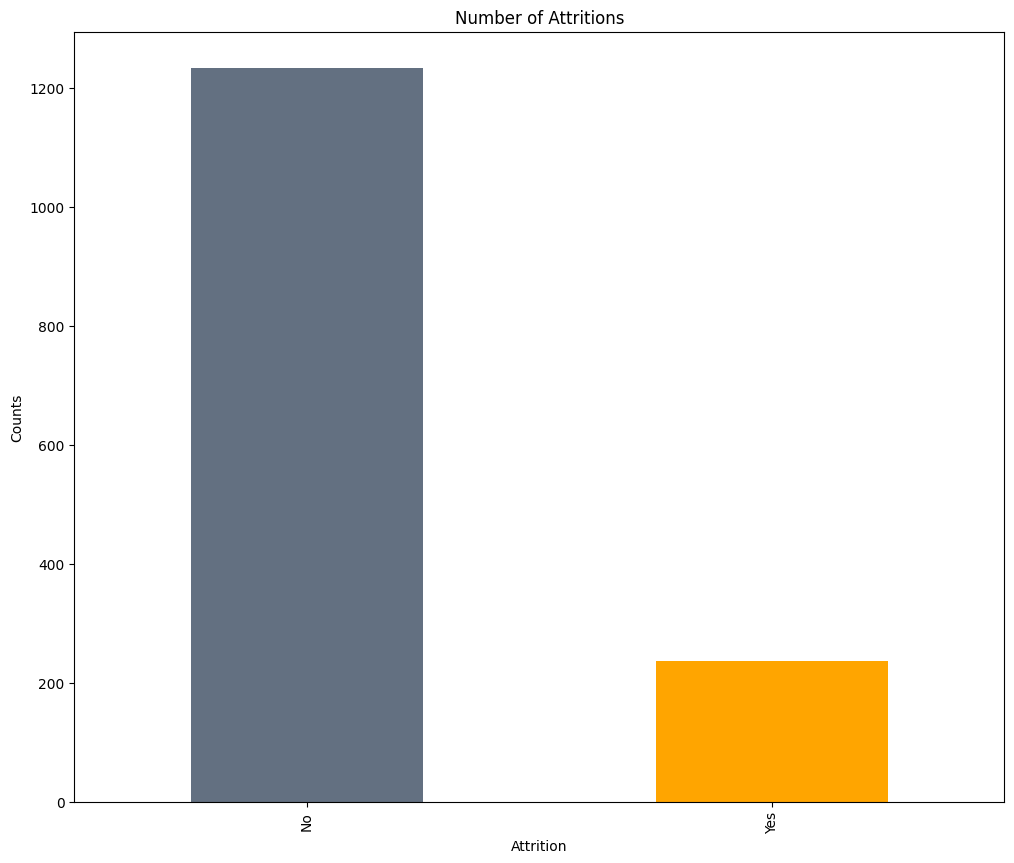

In [363]:
plt.figure(figsize=(12,10))
Attrition_counts = replicate_df.groupby('Attrition')['Attrition'].value_counts()
colors = ['#637081', 'orange']
Attrition_counts.plot(kind = 'bar', color=colors)

plt.xlabel('Attrition')
plt.ylabel('Counts')
plt.title('Number of Attritions')
plt.show()

HOW IS ATTRITION AFFECTED BY GENDER?

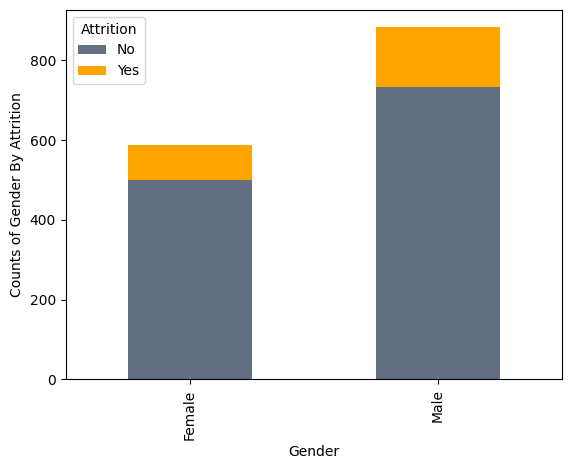

In [364]:
attritionByGender = pd.crosstab(replicate_df['Gender'], replicate_df['Attrition'])
attritionByGender.plot(kind='bar', stacked= True, color = ['#637081', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Counts of Gender By Attrition')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

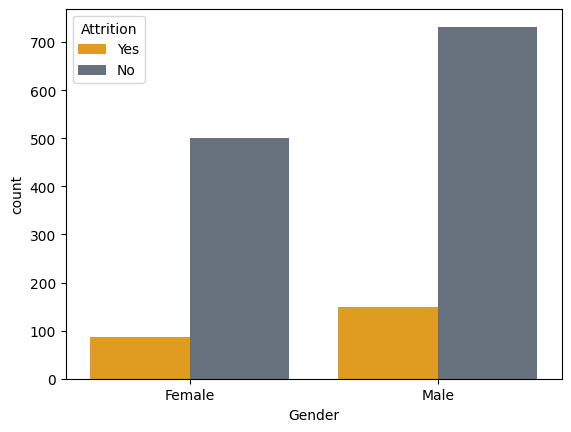

In [365]:
sns.countplot(data=replicate_df, x = 'Gender', hue='Attrition', palette=['orange','#637081'])

HOW IS ATTRITION AFFECTED BY BUSINESS TRAVEL?

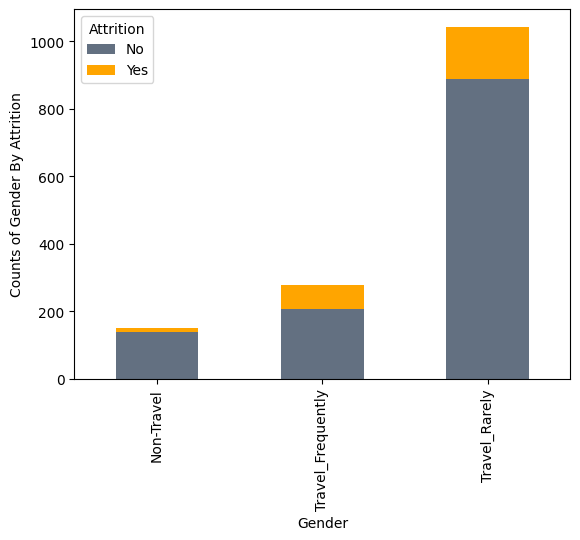

In [366]:
attritionByBusinessTravel = pd.crosstab(replicate_df['BusinessTravel'], replicate_df['Attrition'])
attritionByBusinessTravel.plot(kind='bar', stacked= True, color = ['#637081', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Counts of Gender By Attrition')
plt.show()

<Axes: xlabel='BusinessTravel', ylabel='count'>

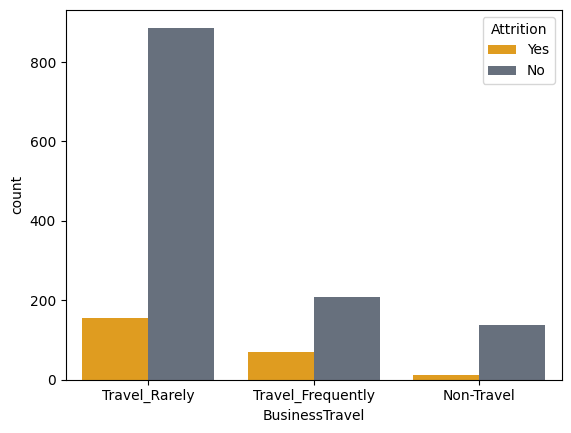

In [367]:
sns.countplot(x = 'BusinessTravel', hue='Attrition', data=replicate_df, palette=['orange', '#637081'])

In [368]:
def age_range(val):
    if val>= 18 and val<=20:
        return '18 - 20'
    elif val > 20 and val<=30:
        return '21 - 30'
    elif val > 30 and val <=40:
        return '31 - 40'
    elif val > 40 and val <= 50:
        return '41 - 50'
    elif val > 50 and val <=60:
        return '51 - 60'


replicate_df['AgeRange'] = replicate_df['Age'].apply(lambda x: age_range(x))
replicate_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AgeRange'],
      dtype='object')

In [369]:
def distance_range(val):
    if val>= 1 and val<=5:
        return '1 - 5'
    elif val > 5 and val<=10:
        return '6 - 10'
    elif val > 10 and val <=15:
        return '11 - 15'
    elif val > 15 and val <= 20:
        return '16 - 20'
    elif val > 20 and val <=25:
        return '21 - 25'
    elif val > 25 and val <=30:
        return '26 - 30'


replicate_df['distanceRange'] = replicate_df['DistanceFromHome'].apply(lambda x: distance_range(x))
replicate_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AgeRange', 'distanceRange'],
      dtype='object')

In [370]:
replicate_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeRange,distanceRange
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,0,8,0,Bad,6,4,0,5,41 - 50,1 - 5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,1,10,3,Better,10,7,1,7,41 - 50,6 - 10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,0,7,3,Better,0,0,0,0,31 - 40,1 - 5
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,0,8,3,Better,8,7,3,0,31 - 40,1 - 5
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,1,6,3,Better,2,2,2,2,21 - 30,1 - 5


In [371]:
replicate_df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeRange,distanceRange
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,1,2061,...,1,17,3,Better,5,2,0,3,31 - 40,21 - 25
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,1,2062,...,1,9,5,Better,7,7,1,7,31 - 40,6 - 10
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,1,2064,...,1,6,0,Better,6,2,0,3,21 - 30,1 - 5
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,1,2065,...,0,17,3,Good,9,6,0,8,41 - 50,1 - 5
1469,34,No,Travel_Rarely,628,Research & Development,8,Bachelor,Medical,1,2068,...,0,6,3,Best,4,3,1,2,31 - 40,6 - 10


ATTRITIONS BY AGE AND DISTANCE FROM HOME

<Axes: xlabel='AgeRange', ylabel='count'>

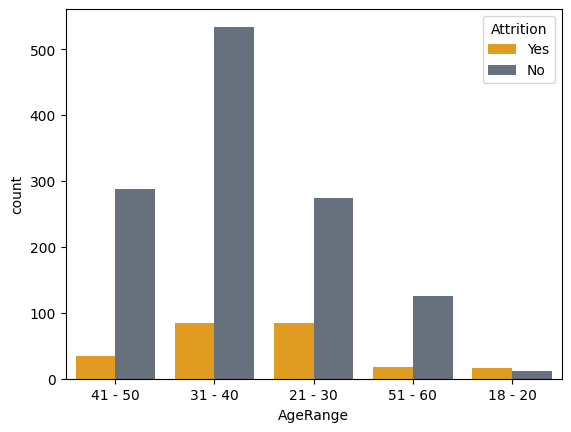

In [372]:
sns.countplot(data=replicate_df, x= 'AgeRange', hue='Attrition', palette=['orange', '#637081'])

<Axes: xlabel='distanceRange', ylabel='count'>

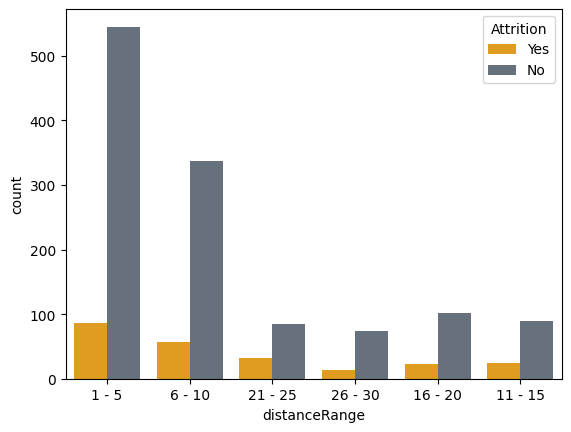

In [373]:
sns.countplot(data=replicate_df, x= 'distanceRange', hue='Attrition', palette=['orange', '#637081'])

EMPLOYEES EDUCATION IN DIFFERENT DEPARTMENTS

<Axes: xlabel='Department', ylabel='count'>

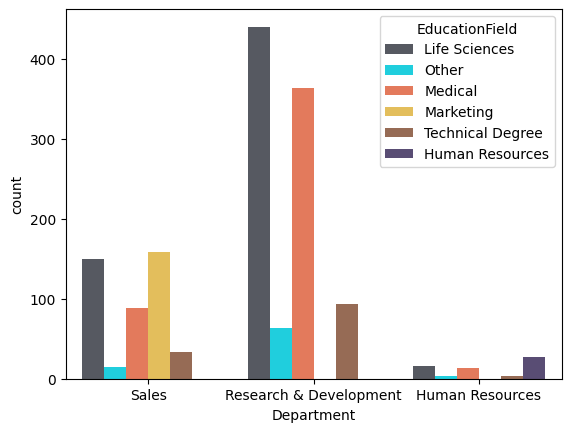

In [374]:
sns.countplot(data=replicate_df, x='Department', hue='EducationField', palette=['#545863', '#00E8FC', '#F96E46', '#F9C846', '#A1674A', '#57467B'])

In [375]:
fig = px.sunburst(df, path=['Department', 'Attrition'], height=840)

# Update the traces to display label, percent, and parent information
fig.update_traces(textinfo="label+percent parent")

# Show the chart
fig.show()

ATTRITION With CURRENT MANAGER

In [376]:
man_att = df.groupby(['YearsWithCurrManager', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

man_att
# Create a line plot using Plotly Express
fig = px.line(man_att, x='YearsWithCurrManager', y='Counts', color='Attrition', 
              title='Count of People Spending Years with a Manager in an Organization')

# # Show the plot
fig.show()

ATTRITION BY JOBROLES

In [377]:
fig = px.histogram(data_frame=replicate_df, x = 'JobRole', color='Attrition', width=800, height=600, template='simple_white')
fig.update_layout(title = {'text':'Attrition By Job Roles'})

SALARY HIKE BY YEARS

<Axes: xlabel='YearsAtCompany', ylabel='PercentSalaryHike'>

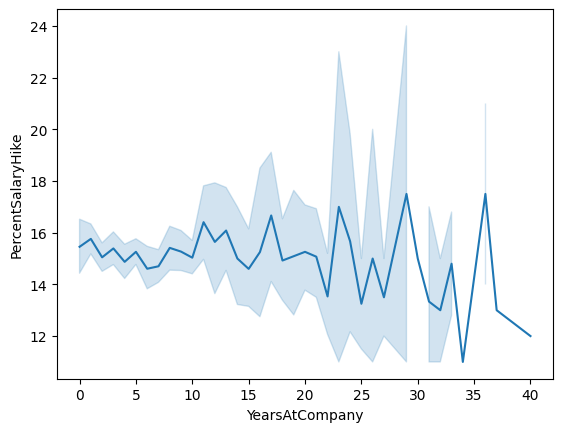

In [378]:
sns.lineplot(data=replicate_df, y = 'PercentSalaryHike', x = 'YearsAtCompany')

ATTRITION BY SALARYHIKE

<Axes: xlabel='PercentSalaryHike', ylabel='count'>

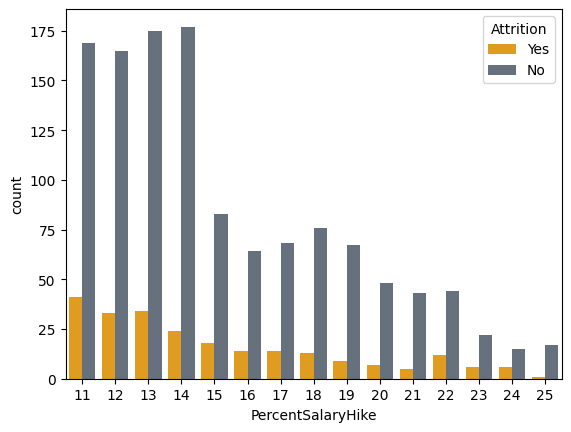

In [379]:
sns.countplot(data=replicate_df, x='PercentSalaryHike', hue='Attrition', palette=['orange', '#637081'])

WHICH EDUACATION FIELD EMPLOYEES IS LIKELY TO LEAVE?

In [380]:
attrition_education = pd.DataFrame(df.groupby('EducationField')['Attrition'].value_counts())
attrition_education = attrition_education.rename(columns={'Attrition': 'Count'})
attrition_education = attrition_education.reset_index()
attrition_education
px.bar(attrition_education, x='EducationField', y='count', color='Attrition', barmode='group')

WHICH DEPARTMENT EMPLOYEES IS LIKELY TO LEAVE?

In [381]:
attrition_department = pd.DataFrame(df.groupby('Department')['Attrition'].value_counts())
attrition_department = attrition_department.rename(columns={'Attrition': 'Count'})
attrition_department = attrition_department.reset_index()
px.bar(attrition_department, x='Department', y='count', color='Attrition', barmode='group')

ATTRITION BY OVERTIME

## DO OVERTIME STRESSES EMPLOYEE AND MAKE THEM TO LEAVE ORGANIZATION?

<Axes: xlabel='OverTime', ylabel='count'>

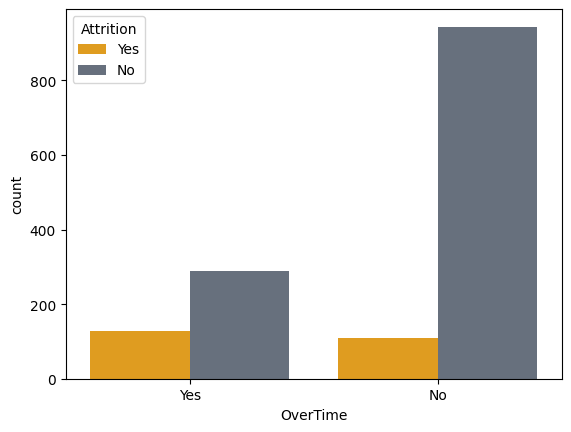

In [382]:
sns.countplot(data=replicate_df, x = 'OverTime', hue='Attrition', palette=['orange', '#637081'])

COUNT OF EMPLOYEES BY ENVIRONMENT SATISFACTION AND DEPARTMENT 

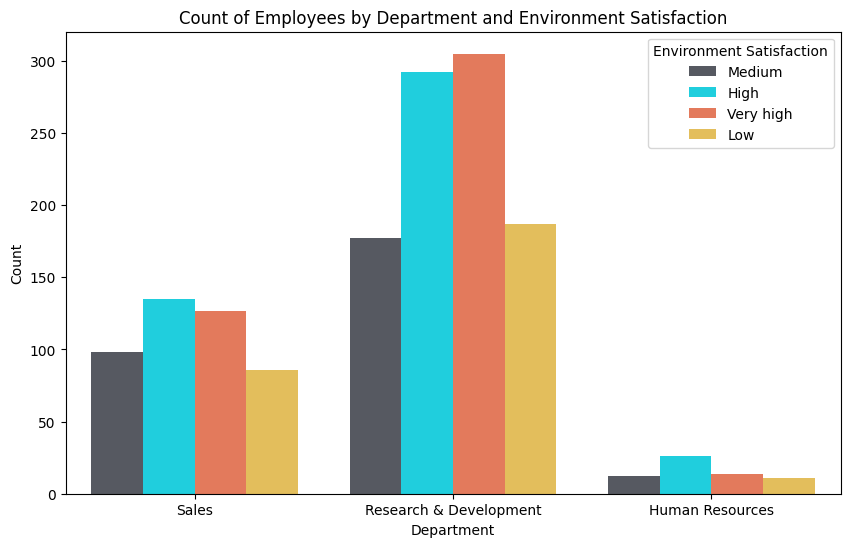

In [383]:
plt.figure(figsize=(10, 6))

# Create a count plot with color differentiation based on 'EnvironmentSatisfaction'
sns.countplot(data=replicate_df, x='Department', hue='EnvironmentSatisfaction', dodge=True, palette=['#545863', '#00E8FC', '#F96E46', '#F9C846', '#A1674A', '#57467B'])

# Set labels and title
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Count of Employees by Department and Environment Satisfaction')

# Show the legend
plt.legend(title='Environment Satisfaction')

# Show the plot
plt.show()

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

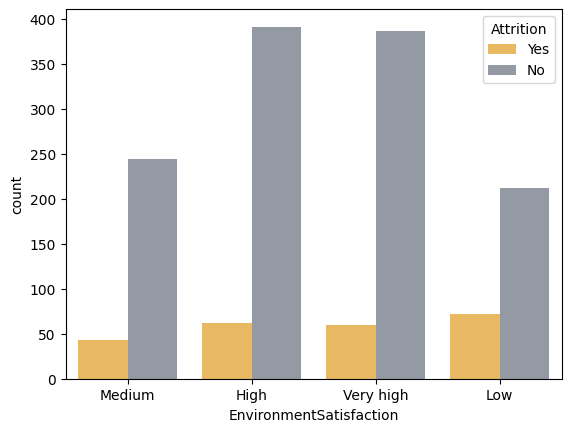

In [384]:
sns.countplot(data=replicate_df, x='EnvironmentSatisfaction', hue='Attrition', dodge=True,palette=['orange', '#637081'], alpha=0.7)

ATTRITION BY AGE

<Axes: xlabel='Age', ylabel='Count'>

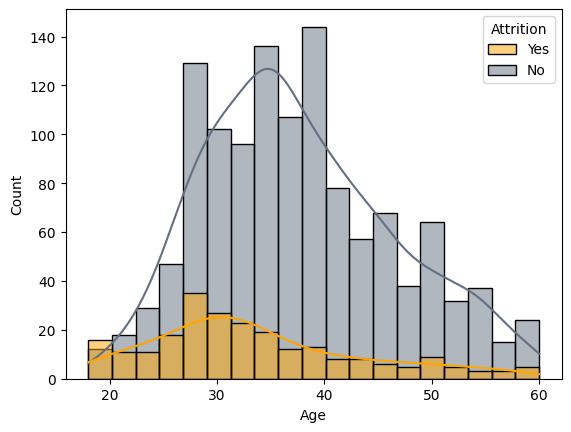

In [385]:
sns.histplot(x="Age",hue="Attrition",data=df,kde=True,palette=['orange', '#637081'])

## ATTRITION BY NONTHLY INCOME AND MARITAL STATUS OF BOTH GENDERS

<Figure size 500x1000 with 0 Axes>

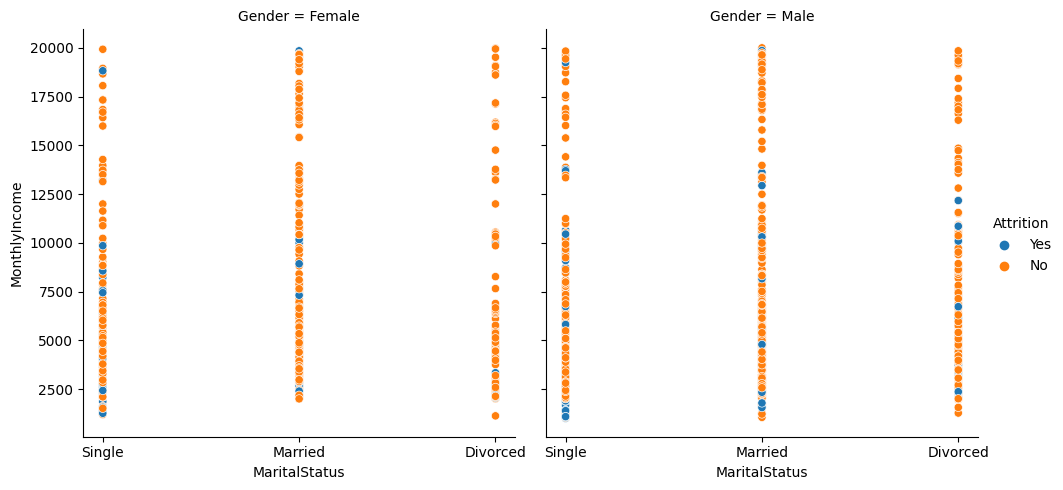

In [386]:
plt.figure(figsize=(5,10))
sns.relplot(data= replicate_df, y="MonthlyIncome", x="MaritalStatus", hue="Attrition",col='Gender')
plt.show()

## ATTRITION BY MONTHLY INCOME AND JOBROLE OF BOTH GENDERS

C:\Users\Hassan\AppData\Local\Temp\ipykernel_1044\1303857824.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



<Figure size 500x1000 with 0 Axes>

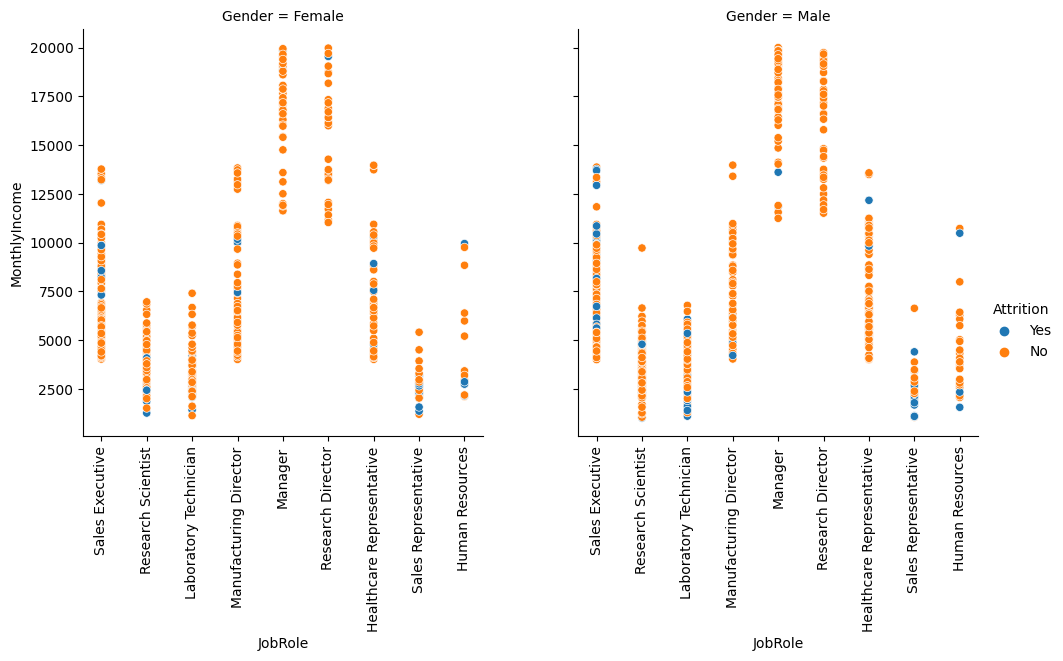

In [387]:
plt.figure(figsize=(5,10))
ax=sns.relplot(data=df, y="MonthlyIncome", x="JobRole", hue="Attrition",col='Gender')
rotation = 90 
for i, ax in enumerate(ax.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
#plt.xticks(rotation=90)
plt.show()

## PREDICTIVE ANALYSIS

In [388]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [389]:
label_encoding1 = {
    'BusinessTravel':{'Travel_Rarely':2, 'Travel_Frequently':3, 'Non-Travel':3},
    'Attrition':{'Yes':1, 'No':2},
    'Department':{'Sales':1, 'Research & Development':2, 'Human Resources':3},
    'Gender':{'Male':0, 'Female':1},
    'MaritalStatus':{'Single':1, 'Married':2, 'Divorced':3},
    'Over18':{'Y':1, 'N':0},
    'OverTime':{'Yes':1, 'No':0},
    'EducationField':{'Life Sciences':1, 'Medical':2, 'Marketing':3, 'Technical Degree':4, 'Human Resources':5, 'Other':6},
    'JobRole':{'Sales Executive':1, 'Manufacturing Director':2, 'Healthcare Representative':3, 'Manager':4, 'Research Director':5, 'Laboratory Technician':6, 'Sales Representative':7, 'Research Scientist':8, 'Human Resources':9}

}

In [390]:
df = df.replace(label_encoding1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,2,3,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,2,2,2,6,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,2,3,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,2,2,591,2,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [391]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,2,3,884,2,23,2,2,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,2,613,2,6,1,2,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,2,155,2,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,2,3,1023,1,2,3,2,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,2,2,628,2,8,3,2,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [392]:
df.drop(columns=['YearsInCurrentRole', 'YearsAtCompany', 'YearsWithCurrManager'], axis=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
0,41,1,2,1102,1,1,2,1,1,1,...,1,11,3,1,80,0,8,0,1,0
1,49,2,3,279,2,8,1,1,1,2,...,0,23,4,4,80,1,10,3,3,1
2,37,1,2,1373,2,2,2,6,1,4,...,1,15,3,2,80,0,7,3,3,0
3,33,2,3,1392,2,3,4,1,1,5,...,1,11,3,3,80,0,8,3,3,3
4,27,2,2,591,2,2,1,2,1,7,...,0,12,3,4,80,1,6,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,3,884,2,23,2,2,1,2061,...,0,17,3,3,80,1,17,3,3,0
1466,39,2,2,613,2,6,1,2,1,2062,...,0,15,3,1,80,1,9,5,3,1
1467,27,2,2,155,2,4,3,1,1,2064,...,1,20,4,2,80,1,6,0,3,0
1468,49,2,3,1023,1,2,3,2,1,2065,...,0,14,3,4,80,0,17,3,2,0


In [393]:
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
DF1 = df.drop(columns=['Attrition'])
norm = scaler.fit_transform(df)
norm_df = pd.DataFrame(norm,columns=df.columns)

In [394]:
norm_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.0,0.0,0.715820,0.0,0.000000,0.25,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,1.0,1.0,0.126700,0.5,0.250000,0.00,0.0,0.0,0.000484,...,1.000000,0.0,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,0.0,0.0,0.909807,0.5,0.035714,0.25,1.0,0.0,0.001451,...,0.333333,0.0,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,1.0,1.0,0.923407,0.5,0.071429,0.75,0.0,0.0,0.001935,...,0.666667,0.0,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,1.0,0.0,0.350036,0.5,0.035714,0.00,0.2,0.0,0.002903,...,1.000000,0.0,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,1.0,1.0,0.559771,0.5,0.785714,0.25,0.2,0.0,0.996613,...,0.666667,0.0,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,0.500000,1.0,0.0,0.365784,0.5,0.178571,0.00,0.2,0.0,0.997097,...,0.000000,0.0,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,0.214286,1.0,0.0,0.037938,0.5,0.107143,0.50,0.0,0.0,0.998065,...,0.333333,0.0,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,0.738095,1.0,1.0,0.659270,0.0,0.035714,0.50,0.2,0.0,0.998549,...,1.000000,0.0,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588


In [395]:
x = norm_df.drop(columns=['Attrition'])
y = norm_df['Attrition']

In [396]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## SMOTE(Synthetic Minorities Oversampling Technique) OVERSMAPLING

In [397]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(x_train,y_train)

## RANDOM FOREST

In [398]:
rfc = RandomForestClassifier()
rfc.fit(smote_train, smote_target)
y_pred = rfc.predict(x_test)


In [399]:
print ('accuracy',metrics.accuracy_score(y_test, y_pred))

accuracy 0.8809523809523809


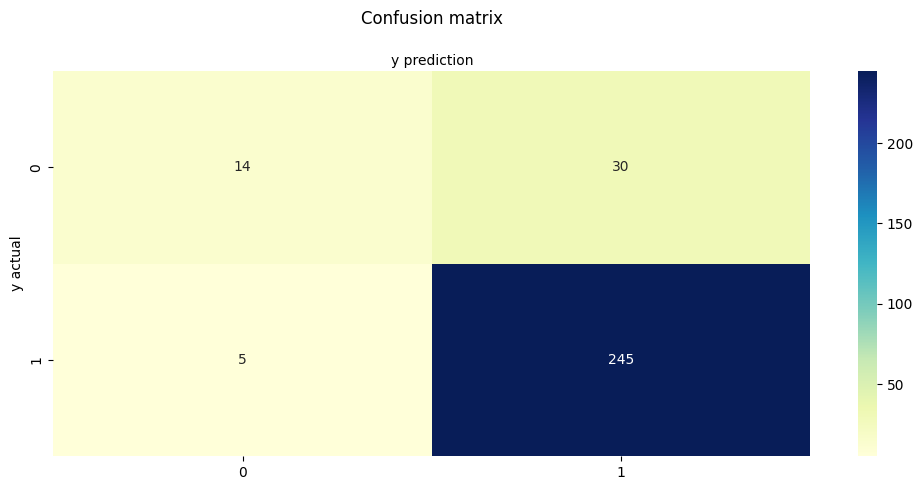

In [401]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()
